# Sensors

[![Click and Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/metadriverse/metadrive/blob/main/documentation/source/sensors.ipynb)


Sensors are important for collecting information about surroundings.
By default, all environments provide 3 basic sensors:

- Lidar
- SideDetector
- LaneLineDetector

which are used for detecting moving objects, sidewalks/solid lines, and broken/solid lines respectively.
As these sensors are built based on ray test and don't need graphics support, they can be used in all modes.
Also, you don't need to recreate them again, as they are not binded with any objects until `perceive()` is called and the target object is specified. After collecting results, those ray-based sensors are detached and ready for next use.

You can access them at anywhere through the `engine.get_sensor(sensor_id)`:

In [1]:
from metadrive.envs.base_env import BaseEnv

env = BaseEnv(dict(log_level=50))
env.reset()

lidar = env.engine.get_sensor("lidar")
side_lidar = env.engine.get_sensor("side_detector")
lane_line_lidar = env.engine.get_sensor("lane_line_detector")
print("Available sensors are:", env.engine.sensors.keys())

env.close()

Available sensors are: dict_keys(['lidar', 'side_detector', 'lane_line_detector'])


## Add New Sensor
To add new sensors, you should request them by using `env_config`.
If an sensor is defined as follows:
```python
class MySensor(BaseSensor):

    def __init__(self, args_1, args_2, engine)
```
Then we can create it by:
```python
env_cfg = dict(sensors=dict(new_sensor=(MySensor, args_1, args_2)))
env = MetaDriveEnv(env_cfg)
```
The following example shows how to create a RGBCamera whose buffer size are width=32, height=16.
**Note: for creating cameras or any sensors requiring rendering, please turn on `image_observation`**.

In [2]:
from metadrive.envs.base_env import BaseEnv
from metadrive.component.sensors.rgb_camera import RGBCamera
import cv2
import os
size = (256, 128) if not os.getenv('TEST_DOC') else (16, 16) # for github CI

env_cfg = dict(log_level=50, # suppress log
               image_observation=True,
               show_terrain=not os.getenv('TEST_DOC'),
               sensors=dict(rgb=[RGBCamera, *size]))

env = BaseEnv(env_cfg)
env.reset()
print("Available sensors are:", env.engine.sensors.keys())
cam = env.engine.get_sensor("rgb")
img = cam.get_rgb_array_cpu()
cv2.imwrite("img.png", img)

env.close()

Available sensors are: dict_keys(['lidar', 'side_detector', 'lane_line_detector', 'rgb'])


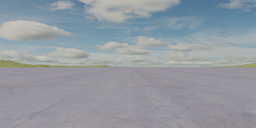

In [3]:
from IPython.display import Image
Image(open("img.png", "rb").read())

The log message shows that not only the `rgb` is created, but a `main_camera` is provided automatically, which is also an RGB camera rendering into the pop-up window. It can serve as a sensor as well.

## Graphics-based Sensors

We provide the following sensors:

* Main Camera
* RGB Camera
* Depth Camera
* Semantic Camera
* Instance Camera
* Lidar (Cloud Point)

The following example mainly uses the semantic camera, but the same method can be applied to other sensors including the point cloud.

### Using semantic camera as observation

In [8]:
from metadrive.envs import MetaDriveEnv
from metadrive.component.sensors.semantic_camera import SemanticCamera
import matplotlib.pyplot as plt
import os

size = (256, 128) if not os.getenv('TEST_DOC') else (16, 16) # for github CI

env = MetaDriveEnv(dict(
    log_level=50, # suppress log
    image_observation=True,
    show_terrain=not os.getenv('TEST_DOC'),
    sensors={"sementic_camera": [SemanticCamera, *size]},
    vehicle_config={"image_source": "sementic_camera"},
    stack_size=3,
))
obs, info = env.reset()
for _ in range(5):
    obs, r, d, t, i = env.step((0, 1))

env.close()

print({k: v.shape for k, v in obs.items()})  # Image is in shape (H, W, C, num_stacks)

{'image': (128, 256, 3, 3), 'state': (19,)}


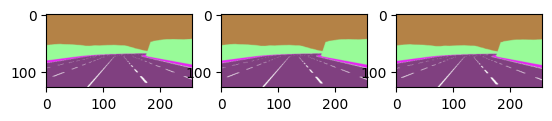

In [10]:
plt.subplot(131)
plt.imshow(obs["image"][:, :, :, 0])
plt.subplot(132)
plt.imshow(obs["image"][:, :, :, 1])
plt.subplot(133)
plt.imshow(obs["image"][:, :, :, 2])

### Retrieve semantic images

Available sensors are: dict_keys(['lidar', 'side_detector', 'lane_line_detector', 'sementic_camera'])


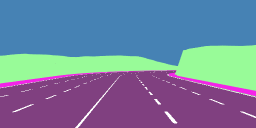

In [1]:
from metadrive.envs import MetaDriveEnv
from metadrive.component.sensors.semantic_camera import SemanticCamera
import cv2
import os
size = (256, 128) if not os.getenv('TEST_DOC') else (16, 16) # for github CI

env = MetaDriveEnv(dict(
    log_level=50, # suppress log
    image_observation=True,
    show_terrain=not os.getenv('TEST_DOC'),
    sensors={"sementic_camera": [SemanticCamera, *size]},
    vehicle_config={"image_source": "sementic_camera"}
))
env.reset()
print("Available sensors are:", env.engine.sensors.keys())
cam = env.engine.get_sensor("sementic_camera")
img = cam.get_image(env.agent)
cv2.imwrite("semantics.png", img)

env.close()

from IPython.display import Image
Image(open("semantics.png", "rb").read())

### Demo on RGB camera

In [ ]:
from metadrive.envs.base_env import BaseEnv
from metadrive.component.sensors.rgb_camera import RGBCamera
import cv2
import os
size = (256, 128) if not os.getenv('TEST_DOC') else (16, 16) # for github CI

env_cfg = dict(log_level=50, # suppress log
               image_observation=True,
               show_terrain=not os.getenv('TEST_DOC'),
               sensors=dict(sementic_camera=[RGBCamera, *size]))

env = BaseEnv(env_cfg)
env.reset()
print("Available sensors are:", env.engine.sensors.keys())
cam = env.engine.get_sensor("sementic_camera")
img = cam.get_rgb_array_cpu()
cv2.imwrite("semantics.png", img)

env.close()

from IPython.display import Image
Image(open("semantics.png", "rb").read())